In [27]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# ADHB
ADHB adalah singkatan dari Atas Dasar Harga Berlaku. Dalam konteks Produk Domestik Regional Bruto (PDRB), ADHB mengacu pada nilai total barang dan jasa yang diproduksi dalam suatu wilayah pada harga yang berlaku saat produksi tersebut terjadi. Jadi, PDRB ADHB adalah PDRB yang dihitung dengan menggunakan harga yang berlaku pada tahun tertentu.

Penjelasan Lebih Lanjut:

***PDRB (Produk Domestik Regional Bruto):***
PDRB adalah ukuran total nilai barang dan jasa akhir yang dihasilkan dalam suatu wilayah (provinsi, kabupaten/kota) selama periode waktu tertentu (biasanya satu tahun).

***Atas Dasar Harga Berlaku (ADHB):***
ADHB menunjukkan bahwa nilai PDRB dihitung dengan menggunakan harga yang berlaku pada saat barang dan jasa tersebut diproduksi. Ini berarti jika ada inflasi atau perubahan harga, PDRB ADHB akan mencerminkan perubahan tersebut.

***Kegunaan PDRB ADHB:***
PDRB ADHB digunakan untuk melihat pergeseran dan struktur ekonomi suatu daerah, serta untuk melihat pendapatan yang dinikmati oleh penduduk daerah tersebut. PDRB ADHB juga berguna untuk membandingkan nilai ekonomi antar daerah pada tahun yang sama.


Sebagai contoh, jika kita menghitung PDRB ADHB sebuah kabupaten pada tahun 2024, maka nilai barang dan jasa akan dihitung berdasarkan harga yang berlaku pada tahun 2024.

In [28]:
# 1. BACA DATA
file_path = "adhb.xlsx"
df = pd.read_excel(file_path)

In [29]:
# 2. Menampilkan informasi umum mengenai data sebelum kolom tahun diubah tipenya
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tahun   15 non-null     int64  
 1   nilai   15 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 372.0 bytes
None


In [30]:
# 3. KONVERSI KOLON 'tahun' KE FORMAT yyyy-mm-dd
df['tahun'] = pd.to_datetime(df['tahun'].astype(str) + "-01-01")

In [31]:
# 4. URUTKAN DATA
df = df.sort_values(by='tahun')

In [32]:
# 5. SIAPKAN FITUR UNTUK MODEL
df['year_num'] = df['tahun'].dt.year  # ubah ke nilai numerik (tahun)
X = df[['year_num']]
y = df['nilai']

In [33]:
# 6. Menampilkan informasi umum mengenai data setelah kolom tahun diubah tipenya
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   tahun     15 non-null     datetime64[ns]
 1   nilai     15 non-null     float64       
 2   year_num  15 non-null     int32         
dtypes: datetime64[ns](1), float64(1), int32(1)
memory usage: 432.0 bytes
None


In [34]:
# 7. NORMALISASI FITUR UNTUK REGRESI LINEAR
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [35]:
# 8. TRAINING MODEL
rf = RandomForestRegressor(n_estimators=100, random_state=42)
lr = LinearRegression()

rf.fit(X, y)
lr.fit(X_scaled, y)

LinearRegression()

In [36]:
# 9. PREDIKSI 4 TAHUN KE DEPAN
last_year = df['year_num'].max()
future_years = np.arange(last_year + 1, last_year + 5)
future_dates = pd.to_datetime([f"{year}-01-01" for year in future_years])
future_X = pd.DataFrame({'year_num': future_years})
future_X_scaled = scaler.transform(future_X)

rf_preds = rf.predict(future_X)
lr_preds = lr.predict(future_X_scaled)

# KOMBINASI PREDIKSI (Ensemble)
ensemble_preds = (rf_preds + lr_preds) / 2

In [37]:
# 10. GABUNGKAN DENGAN DATA ASLI UNTUK VISUALISASI
all_years = pd.concat([
    df[['tahun', 'nilai']],
    pd.DataFrame({'tahun': future_dates, 'nilai': ensemble_preds})
], ignore_index=True)

In [38]:
# 11. ANALISIS TREN
initial = ensemble_preds[0]
final = ensemble_preds[-1]
trend = "Naik" if final > initial else "Turun"

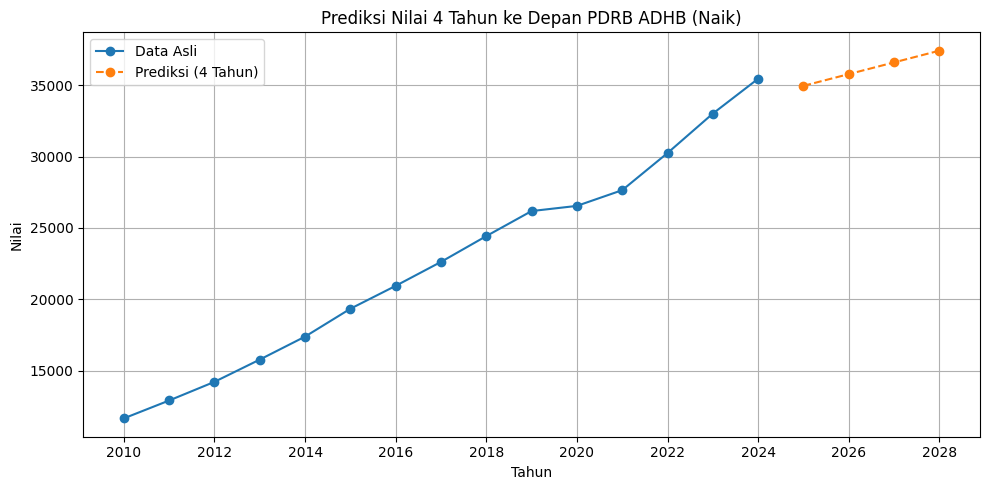

In [39]:
# 12. VISUALISASI HASIL
plt.figure(figsize=(10, 5))
plt.plot(df['tahun'], df['nilai'], label='Data Asli', marker='o')
plt.plot(future_dates, ensemble_preds, label='Prediksi (4 Tahun)', marker='o', linestyle='--')
plt.title(f"Prediksi Nilai 4 Tahun ke Depan PDRB ADHB ({trend})")
plt.xlabel("Tahun")
plt.ylabel("Nilai")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ADHK
ADHK adalah singkatan dari Atas Dasar Harga Konstan. Dalam konteks Produk Domestik Regional Bruto (PDRB), ADHK mengacu pada perhitungan nilai tambah barang dan jasa yang dihasilkan dalam suatu wilayah, di mana nilai tersebut diukur dengan harga-harga yang berlaku pada tahun dasar tertentu. Penggunaan ADHK memungkinkan perbandingan pertumbuhan ekonomi antar tahun tanpa terpengaruh oleh fluktuasi harga (inflasi).

Berikut penjelasan lebih detail:

**PDRB (Produk Domestik Regional Bruto):**
Merupakan indikator penting untuk mengukur kondisi ekonomi suatu daerah dalam suatu periode tertentu.

**ADHK (Atas Dasar Harga Konstan):**
PDRB yang dihitung dengan menggunakan harga pada tahun dasar tertentu (misalnya tahun 2010). Dengan menggunakan harga tahun dasar, pertumbuhan ekonomi dapat diukur dengan lebih akurat karena tidak dipengaruhi oleh perubahan harga (inflasi atau deflasi).

Dengan kata lain, ADHK membantu melihat pertumbuhan ekonomi riil suatu daerah, bukan hanya perubahan nilai karena fluktuasi harga.

In [40]:
# 1. BACA DATA
file_path = "adhk.xlsx"
df = pd.read_excel(file_path)

In [41]:
# 2. Menampilkan informasi umum mengenai data sebelum kolom tahun diubah tipenya
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tahun   15 non-null     int64  
 1   nilai   15 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 372.0 bytes
None


In [42]:
# 3. KONVERSI KOLOM 'tahun' KE FORMAT yyyy-mm-dd
df['tahun'] = pd.to_datetime(df['tahun'].astype(str) + "-01-01")

In [43]:
# 4. URUTKAN DATA
df = df.sort_values(by='tahun')

In [44]:
# 5. SIAPKAN FITUR UNTUK MODEL
df['year_num'] = df['tahun'].dt.year  # ubah ke nilai numerik (tahun)
X = df[['year_num']]
y = df['nilai']

In [45]:
# 6. Menampilkan informasi umum mengenai data setelah kolom tahun diubah tipenya
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   tahun     15 non-null     datetime64[ns]
 1   nilai     15 non-null     float64       
 2   year_num  15 non-null     int32         
dtypes: datetime64[ns](1), float64(1), int32(1)
memory usage: 432.0 bytes
None


In [46]:
# 7. NORMALISASI FITUR UNTUK REGRESI LINEAR
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [47]:
# 8. TRAINING MODEL
rf = RandomForestRegressor(n_estimators=100, random_state=42)
lr = LinearRegression()

rf.fit(X, y)
lr.fit(X_scaled, y)

LinearRegression()

In [48]:
# 9. PREDIKSI 4 TAHUN KE DEPAN
last_year = df['year_num'].max()
future_years = np.arange(last_year + 1, last_year + 5)
future_dates = pd.to_datetime([f"{year}-01-01" for year in future_years])
future_X = pd.DataFrame({'year_num': future_years})
future_X_scaled = scaler.transform(future_X)

rf_preds = rf.predict(future_X)
lr_preds = lr.predict(future_X_scaled)

# KOMBINASI PREDIKSI (Ensemble)
ensemble_preds = (rf_preds + lr_preds) / 2

In [49]:
# 10. GABUNGKAN DENGAN DATA ASLI UNTUK VISUALISASI
all_years = pd.concat([
    df[['tahun', 'nilai']],
    pd.DataFrame({'tahun': future_dates, 'nilai': ensemble_preds})
], ignore_index=True)

In [50]:
# 11. ANALISIS TREN
initial = ensemble_preds[0]
final = ensemble_preds[-1]
trend = "Naik" if final > initial else "Turun"

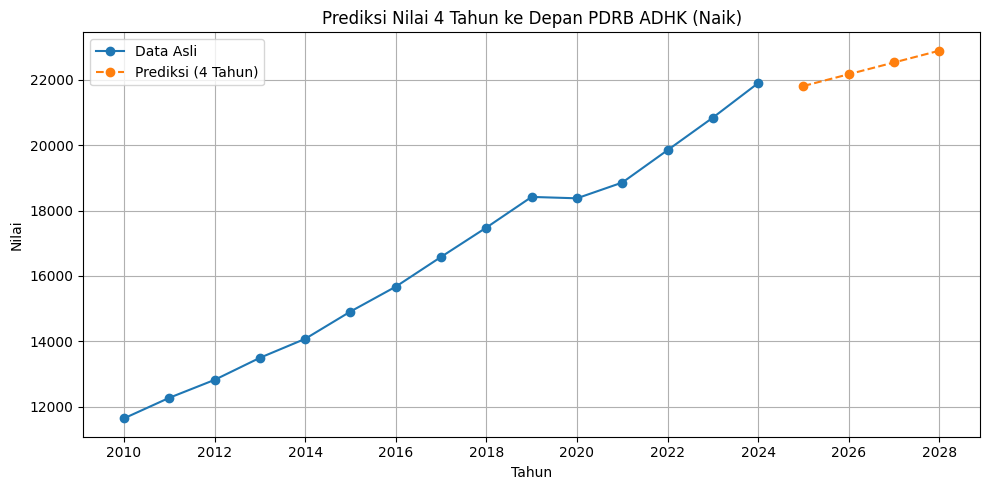

In [51]:
# 12. VISUALISASI HASIL
plt.figure(figsize=(10, 5))
plt.plot(df['tahun'], df['nilai'], label='Data Asli', marker='o')
plt.plot(future_dates, ensemble_preds, label='Prediksi (4 Tahun)', marker='o', linestyle='--')
plt.title(f"Prediksi Nilai 4 Tahun ke Depan PDRB ADHK ({trend})")
plt.xlabel("Tahun")
plt.ylabel("Nilai")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()